# Logistic Regression 1 Year Mortality

In [34]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.linear_model import LogisticRegressionCV

%run ImportPlotFunctions.ipynb

## Load Data 1 Year Mortality

In [8]:
%run LoadData1Y.ipynb

Loaded 1 Year Train Sample:
X_train shape: (38857, 106)
y shape: (38857,)
Loaded 1 Year Test Sample:
X_test shape: (19139, 106)
y_test shape: (19139,)


## Logistic Regression CV

In [9]:
clf = LogisticRegressionCV(
    Cs=10,
    fit_intercept=True,
    cv=10,
    dual=False,
    penalty='l2',
    scoring=None,
    solver='lbfgs',
    tol=0.0001,
    max_iter=100,
    class_weight=None,
    n_jobs=4,
    verbose=0,
    refit=True,
    intercept_scaling=1.0,
    multi_class='ovr',
    random_state=None,
).fit(X_train, y_train)

## Analyze Results

In [38]:
print("Score: ", clf.score(X_test, y_test))
y_score = clf.predict_proba(X_test)[:,1]

Score:  0.789226187366111


## Save Results

In [15]:
np.savetxt("y_score_1y_logreg.csv", y_score, delimiter=",")

## Feature Importance

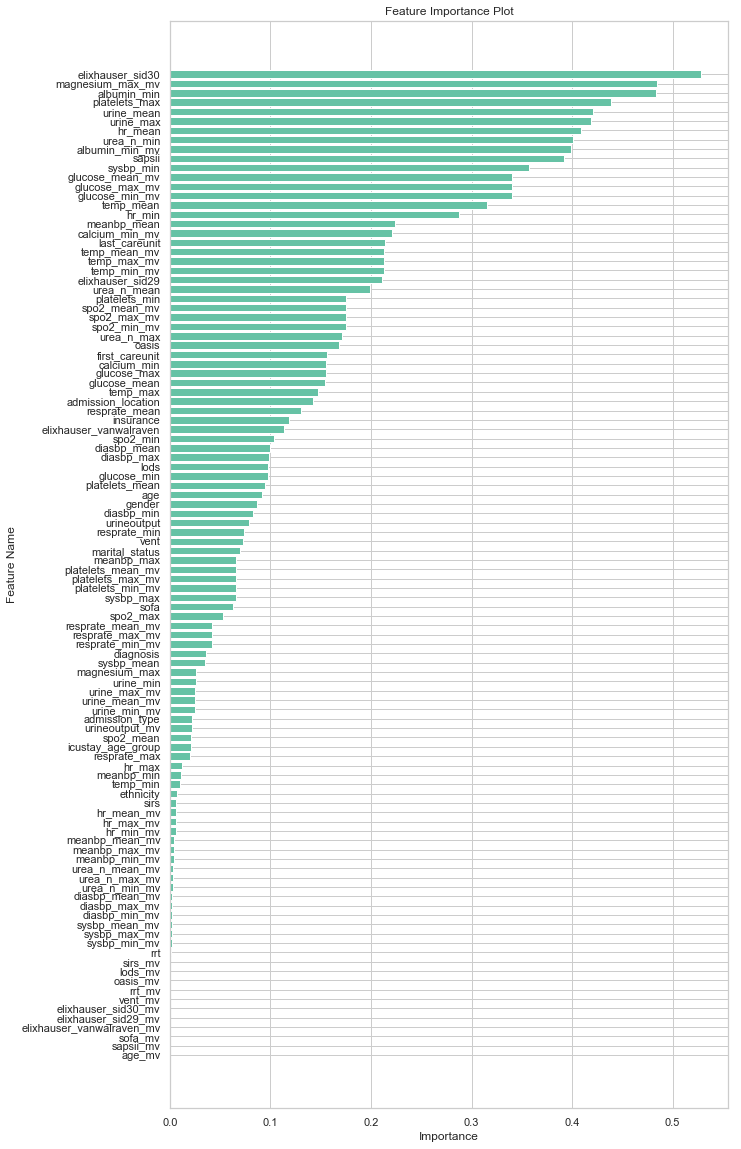

In [20]:
names = X_test.columns.tolist()
values = np.abs(clf.coef_[0])
feature_importance_bar(names, values, figsize=(10, 20))

## Precision Recall Curve

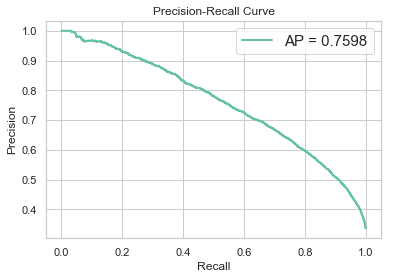

In [39]:
plot_PRC(y_test, y_score)

## ROC Curve

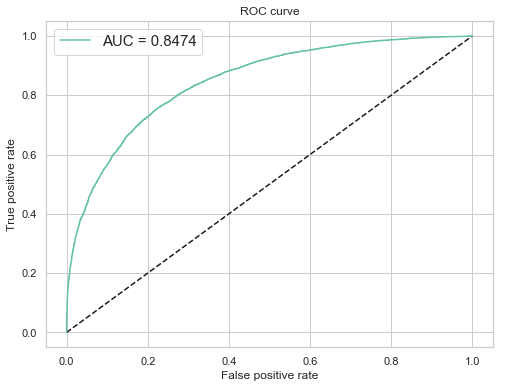

In [41]:
plot_ROC(y_test, y_score)

## Confusion Matrix

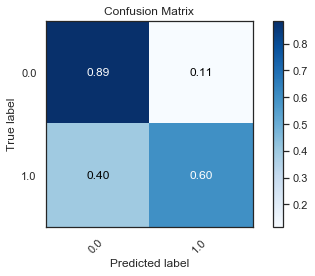

In [42]:
plot_cm(y_test, y_score)